## Visual analysis of pictures 

Hanna Matera 


Write a Python script which does the following:

For each image, find the width, height, and number of channels
For each image, split image into four equal-sized quadrants (i.e. top-left, top-right, bottom-left, bottom-right)
Save each of the split images in JPG format
Create and save a file containing the filename, width, height for all of the new images.


General instructions

For this exercise, you can upload either a standalone script OR a Jupyter Notebook
Save your script as basic_image_processing.py OR basic_image_processing.ipynb
If you have external dependencies, you must include a requirements.txt
You can either upload the script here or push to GitHub and include a link - or both!
Your code should be clearly documented in a way that allows others to easily follow the structure of your script.
Similarly, remember to use descriptive variable names! A name like width is more readable than w.
The filenames of the split images should clearly relate to the original image.


In [5]:
import os
import numpy as np # creating an abbreviation to save keystrokes
import pandas as pd
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


Defining a data frame where the results go 

In [26]:
image_size_df = pd.DataFrame(columns = ['filename', 'height', 'width'])

Specifying data path 

In [9]:
data_path = os.path.join("data_cat", "cat_0205.jpg")

image= cv2.imread(data_path)

Inspecting the size of the image 

In [13]:
image.shape

(429, 469, 3)

Reading an Image - defining jimshow 

In [11]:
def jimshow(image, title=False):
    """imshow with matplotlib dependencies 
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    if depth == 1:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
    if title:
        plt.title(title)
    plt.axis('off')
    
    plt.show()

#displaying an image 

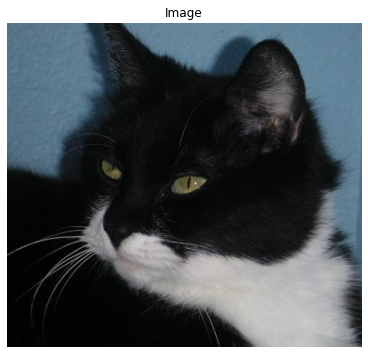

In [12]:
jimshow(image, "Image")

Defining height and width 

In [35]:
height = int(image.shape[0])
width = int(image.shape[1])

#new heights and widths 
new_height = int(image.shape[0]/2)
new_width = int(image.shape[1]/2)

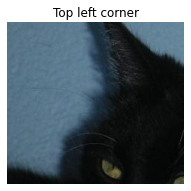

In [36]:
#top left corner 
top_left = image[0:new_height,0:new_width]

jimshow(top_left, "Top left corner")

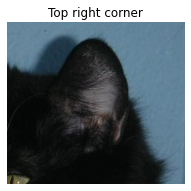

In [39]:
#top right corner 
top_right = image[0:new_height,new_width:width]

jimshow(top_right, "Top right corner")

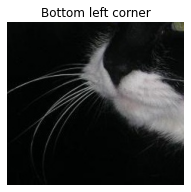

In [41]:
#bottom left corner 
bottom_left= image[new_height:height,0:new_width]

jimshow(bottom_left, "Bottom left corner")

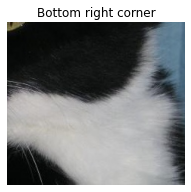

In [42]:
#bottom right corner 
bottom_right = image[new_height:height,new_width:width]

jimshow(bottom_right, "Bottom right corner")

Defining a function that extracts width, heigth and channels 

In [44]:
def width_height_channel(self, image):

        height, width, channels = image.shape[0], image.shape[1], image.shape[2]

        return height, width, channels

Opening all picture 

In [47]:
for filename in Path(data_path).glob("*.jpg"):
    
    

TypeError: width_height_channel() missing 1 required positional argument: 'image'

In [14]:
out_path = os.path.join("..", "Assignment1", "new_images", "new_image.png")

#saving a new image 

cv2.imwrite(out_path, image)

True